## p17 to p27

### p17

In [1]:
import torch
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPModel
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
device='cuda'

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
model.eval();

In [4]:
image = Image.open('me_no_hat_cropped_1.jpeg')
text = "A photo of a man"
# image

In [5]:
inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    image_features_man = model.get_image_features(**inputs)
    image_features_man = image_features_man / image_features_man.norm(dim=-1, keepdim=True)

In [6]:
image_features_man[0,:10], image_features_man.shape

(tensor([ 0.0362, -0.0020, -0.0347,  0.0297, -0.0321, -0.0230,  0.0156,  0.0808,
          0.0237,  0.0073], device='cuda:0'),
 torch.Size([1, 512]))

In [7]:
inputs = processor(text=text, return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    text_features_man = model.get_text_features(**inputs)
    text_features_man = text_features_man / text_features_man.norm(dim=-1, keepdim=True)

In [8]:
text_features_man[0,:10], text_features_man.shape

(tensor([-0.0235,  0.0288, -0.0020,  0.0181, -0.0009, -0.0264, -0.0124, -0.0950,
         -0.0009,  0.0272], device='cuda:0'),
 torch.Size([1, 512]))

In [9]:
vmax=np.max([image_features_man.max().item(), text_features_man.max().item()])
vmin=np.min([image_features_man.min().item(), text_features_man.min().item()])

In [10]:
vmin, vmax

(-0.5947677493095398, 0.6026014685630798)

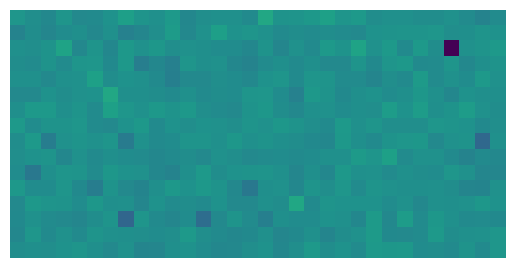

In [11]:
plt.imshow(image_features_man.detach().cpu().numpy().reshape(16,32), vmin=vmin, vmax=vmax)
plt.axis('off')
plt.savefig('embedding_me_no_hat_cropped_1.png', dpi=150, transparent=True, bbox_inches='tight')

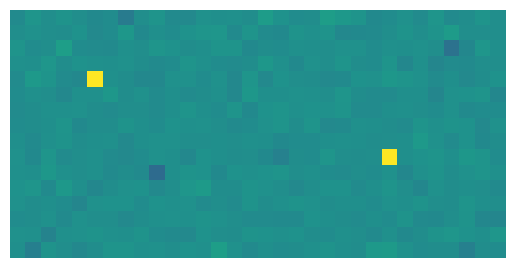

In [12]:
plt.imshow(text_features_man.detach().cpu().numpy().reshape(16,32),vmin=vmin, vmax=vmax)
plt.axis('off')
plt.savefig('embedding_a_photo_of_a_man.png', dpi=150, transparent=True, bbox_inches='tight')

In [13]:
torch.cosine_similarity(image_features_man, text_features_man)

tensor([0.2506], device='cuda:0')

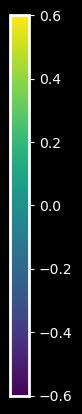

<Figure size 640x480 with 0 Axes>

In [14]:
#Quick colorbar
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(2, 6))
fig.patch.set_facecolor('black')

norm = mcolors.Normalize(vmin=-0.6, vmax=0.6)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap='viridis'),
    ax=ax,
    orientation='vertical'
)

cbar.ax.tick_params(colors='white')
cbar.outline.set_edgecolor('white')
cbar.outline.set_linewidth(2)

ax.remove()
plt.tight_layout()
plt.show()
plt.savefig('colorbar.png', dpi=150, transparent=True, bbox_inches='tight')

In [15]:
image = Image.open('n02123045_1955.jpg')
text = "A photo of a cat"

inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    image_features_cat = model.get_image_features(**inputs)
    image_features_cat = image_features_cat / image_features_cat.norm(dim=-1, keepdim=True)

inputs = processor(text=text, return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    text_features_cat = model.get_text_features(**inputs)
    text_features_cat = text_features_cat / text_features_cat.norm(dim=-1, keepdim=True)

In [16]:
np.max([image_features_cat.max().item(), text_features_cat.max().item()]), np.min([image_features_cat.min().item(), text_features_cat.min().item()])

(0.5920506715774536, -0.7058871388435364)

In [17]:
vmin=-0.6
vmax=0.6

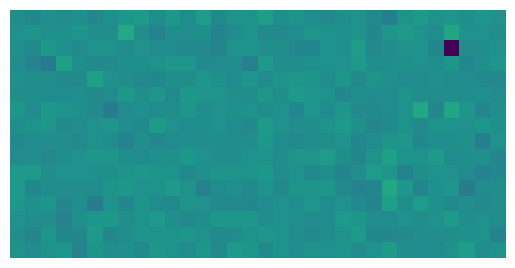

In [18]:
plt.imshow(image_features_cat.detach().cpu().numpy().reshape(16,32), vmin=vmin, vmax=vmax)
plt.axis('off')
plt.savefig('embedding_cat.png', dpi=150, transparent=True, bbox_inches='tight')

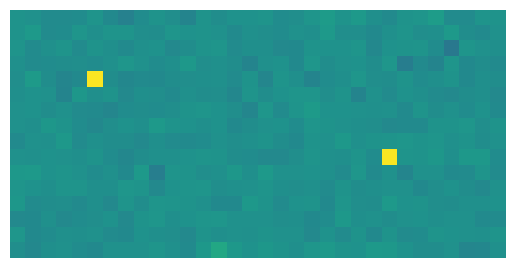

In [19]:
plt.imshow(text_features_cat.detach().cpu().numpy().reshape(16,32), vmin=vmin, vmax=vmax)
plt.axis('off')
plt.savefig('embedding_a_photo_of_a_cat.png', dpi=150, transparent=True, bbox_inches='tight')

In [20]:
image = Image.open('n02099601_7101.jpg')
text = "A photo of a dog"

inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    image_features_dog = model.get_image_features(**inputs)
    image_features_dog = image_features_dog / image_features_dog.norm(dim=-1, keepdim=True)

inputs = processor(text=text, return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    text_features_dog = model.get_text_features(**inputs)
    text_features_dog = text_features_dog / text_features_dog.norm(dim=-1, keepdim=True)

In [21]:
np.max([image_features_dog.max().item(), text_features_dog.max().item()]), np.min([image_features_dog.min().item(), text_features_dog.min().item()])

(0.5973504781723022, -0.5931177735328674)

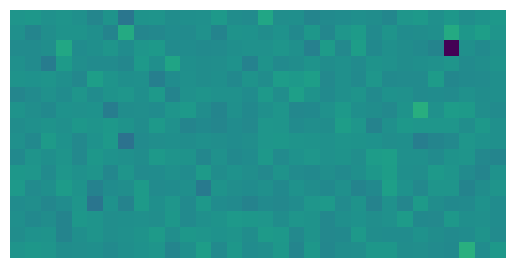

In [22]:
plt.imshow(image_features_dog.detach().cpu().numpy().reshape(16,32), vmin=vmin, vmax=vmax)
plt.axis('off')
plt.savefig('embedding_dog.png', dpi=150, transparent=True, bbox_inches='tight')

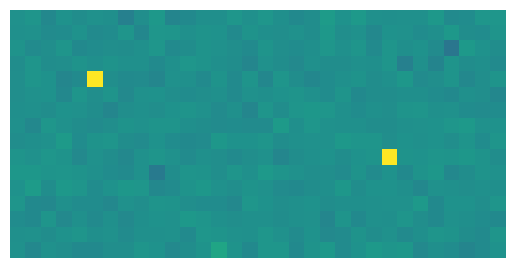

In [23]:
plt.imshow(text_features_dog.detach().cpu().numpy().reshape(16,32), vmin=vmin, vmax=vmax)
plt.axis('off')
plt.savefig('embedding_a_photo_of_a_dog.png', dpi=150, transparent=True, bbox_inches='tight')

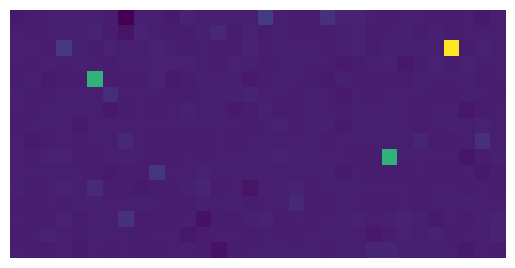

In [24]:
prod=image_features_man*text_features_man
plt.imshow(prod.detach().cpu().numpy().reshape(16,32))
plt.axis('off')
plt.savefig('man_man.png', dpi=150, transparent=True, bbox_inches='tight')

Hmm how much of the sum is dominated by thos strong values?

In [25]:
torch.topk(prod, 10)

torch.return_types.topk(
values=tensor([[0.0852, 0.0529, 0.0527, 0.0086, 0.0076, 0.0068, 0.0059, 0.0057, 0.0053,
         0.0046]], device='cuda:0'),
indices=tensor([[ 92, 133, 312,  16,  67, 329,  20, 423, 286, 166]], device='cuda:0'))

In [26]:
torch.topk(prod.abs(), 10)

torch.return_types.topk(
values=tensor([[0.0852, 0.0529, 0.0527, 0.0086, 0.0077, 0.0076, 0.0068, 0.0059, 0.0057,
         0.0053]], device='cuda:0'),
indices=tensor([[ 92, 133, 312,  16,   7,  67, 329,  20, 423, 286]], device='cuda:0'))

In [27]:
prod.sum()

tensor(0.2506, device='cuda:0')

In [29]:
0.0852+0.0529+0.0527

0.1908

Yeah that's cool, so strong alignment in those 3 dimensions is contributing to like 80% of the dot product. 

In [41]:
cos_similarities=np.zeros((3,3))
dot_products=np.zeros((3,3))
prods=[]

for i, (name_image, feature_image) in enumerate(zip(['cat_image', 'dog_image', 'man_image'], 
                                     [image_features_cat, image_features_dog, image_features_man])):
    prods.append([])
    for j, (name_text, feature_text) in enumerate(zip(['cat_text', 'dog_text', 'man_text'], 
                                     [text_features_cat, text_features_dog, text_features_man])):
        cos_similarities[i,j]=torch.cosine_similarity(feature_image, feature_text)
        prod=feature_image*feature_text
        dot_products[i,j]=prod.sum().item()
        prods[-1].append(prod.detach().cpu().numpy().reshape(16,32))
        print(prod.min().item(), prod.max().item())
        

-0.003466053633019328 0.08594798296689987
-0.0037271862383931875 0.0911717638373375
-0.005078713875263929 0.10113424807786942
-0.008003893308341503 0.07221732288599014
-0.008606906980276108 0.07660657167434692
-0.011727887205779552 0.08497749269008636
-0.006035139784216881 0.0724182203412056
-0.006200791802257299 0.07681968063116074
-0.007674189750105143 0.08521389216184616


In [42]:
cos_similarities

array([[0.27838621, 0.22083758, 0.21663226],
       [0.19343477, 0.26263025, 0.20955767],
       [0.19544807, 0.20560795, 0.25059879]])

In [43]:
dot_products

array([[0.27838621, 0.22083758, 0.21663226],
       [0.19343476, 0.26263022, 0.20955765],
       [0.19544804, 0.20560792, 0.25059876]])

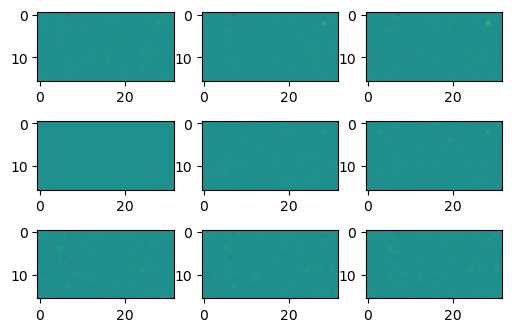

In [61]:
fig=plt.figure(0,(6,4))
for i in range(3):
    for j in range(3):
        fig.add_subplot(3,3,3*i+j+1)
        plt.imshow(prods[i][j]-prods[1][0], vmin=-0.01, vmax=0.1)

In [49]:
i

0

In [50]:
j

0

In [51]:
prods[i,j]

TypeError: list indices must be integers or slices, not tuple

In [53]:
prods[0,0]

TypeError: list indices must be integers or slices, not tuple

In [33]:
prod.max()

tensor(0.0852, device='cuda:0')

In [34]:
prod.min()

tensor(-0.0077, device='cuda:0')